<a href="https://colab.research.google.com/github/OrianaMart/ECEN-403---Team-39/blob/ML/TEAM39_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip DatasetV3.zip #This portion unzips the folder containing the dataset images

Streaming output truncated to the last 5000 lines.
  inflating: DatasetV3/Charger/Dell (63).jpg  
  inflating: DatasetV3/Charger/Dell (64).jpg  
  inflating: DatasetV3/Charger/Dell (65).jpg  
  inflating: DatasetV3/Charger/Dell (66).jpg  
  inflating: DatasetV3/Charger/Dell (67).jpg  
  inflating: DatasetV3/Charger/Dell (68).jpg  
  inflating: DatasetV3/Charger/Dell (69).jpg  
  inflating: DatasetV3/Charger/Dell (7).jpeg  
  inflating: DatasetV3/Charger/Dell (70).jpg  
  inflating: DatasetV3/Charger/Dell (71).jpg  
  inflating: DatasetV3/Charger/Dell (72).jpg  
  inflating: DatasetV3/Charger/Dell (73).jpg  
  inflating: DatasetV3/Charger/Dell (74).jpg  
  inflating: DatasetV3/Charger/Dell (75).jpg  
  inflating: DatasetV3/Charger/Dell (76).jpg  
  inflating: DatasetV3/Charger/Dell (77).jpg  
  inflating: DatasetV3/Charger/Dell (79).jpg  
  inflating: DatasetV3/Charger/Dell (8).jpg  
  inflating: DatasetV3/Charger/Dell (80).jpg  
  inflating: DatasetV3/Charger/Dell (81).jpg  
  inflatin

In [ ]:
%rm -rf DatasetV3/ #This is only to be run when the file needs to be cleared out

In [ ]:
import tensorflow as tf    #This section is where all the necessary imports are brought into the project
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.visible_device_list = "0"

set_session(tf.compat.v1.Session(config=config))

import matplotlib.pyplot as plt

In [ ]:
#img_height, img_width = 64,64    #Sets constant image size
#batch_size = 16      #Amount of images to be processed at a given time, the lower the number the easier it is to process

#train_ds = tf.keras.utils.image_dataset_from_directory(          #Set up for the training dataset, takes image directory and turns it into a dataset
    #"DatasetV3/Training",                                   #Sets training image directory to training dataset
    #image_size = (img_height, img_width),                    #Constant image size that matches previously set size
    #batch_size = batch_size                                       #Constant bach size
#)
#val_ds = tf.keras.utils.image_dataset_from_directory(       #Set up for the validation dataset, takes image directory and turns it into a dataset
    #"DatasetV3/Validation",                                    #Sets validation image directory to validation dataset
    #image_size = (img_height, img_width),                        #Constant image size that matches previously set size
    #batch_size = batch_size                                              #Constant bach size
#)
#test_ds = tf.keras.utils.image_dataset_from_directory(       #Set up for the testing dataset, takes image directory and turns it into a dataset
    #"DatasetV3/Testing",                                       #Sets testing image directory to testing dataset
    #image_size = (img_height, img_width),                        #Constant image size that matches previously set size
    #batch_size = batch_size                                     #Constant bach size
#)

In [ ]:
img_height, img_width = 180,180
image_size = (img_height, img_width)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "DatasetV3",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 6635 files belonging to 11 classes.
Using 5308 files for training.
Using 1327 files for validation.


In [ ]:
#Filter out corrupted images

from PIL import Image

num_skipped = 0

for folder_name in ("Battery","Calculator","Charger","Jumper Wire","LCD Screen","LED","MOSFET","Microcontroller","Resistor","SD Card","USB"):
    folder_path = os.path.join("DatasetV3", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if fname.endswith('.jpg'):
            try:
                img = Image.open(fpath) # open the image file
                #print("%s", fpath)
                exif_data = img._getexif()
                img.verify() # verify that it is, in fact an image
            except:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)
print("PIL deleted %d images" % num_skipped)

In [ ]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/DatasetV3/Validation'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Charger
processing class directory  LCD Screen
processing class directory  Microcontroller
processing class directory  Calculator
processing class directory  MOSFET
processing class directory  Jumper Wire
processing class directory  SD Card
processing class directory  Resistor
processing class directory  USB
processing class directory  LED
processing class directory  Battery
improper image files are listed below
/content/DatasetV3/Validation/Calculator/Ti-89 (113).jpg


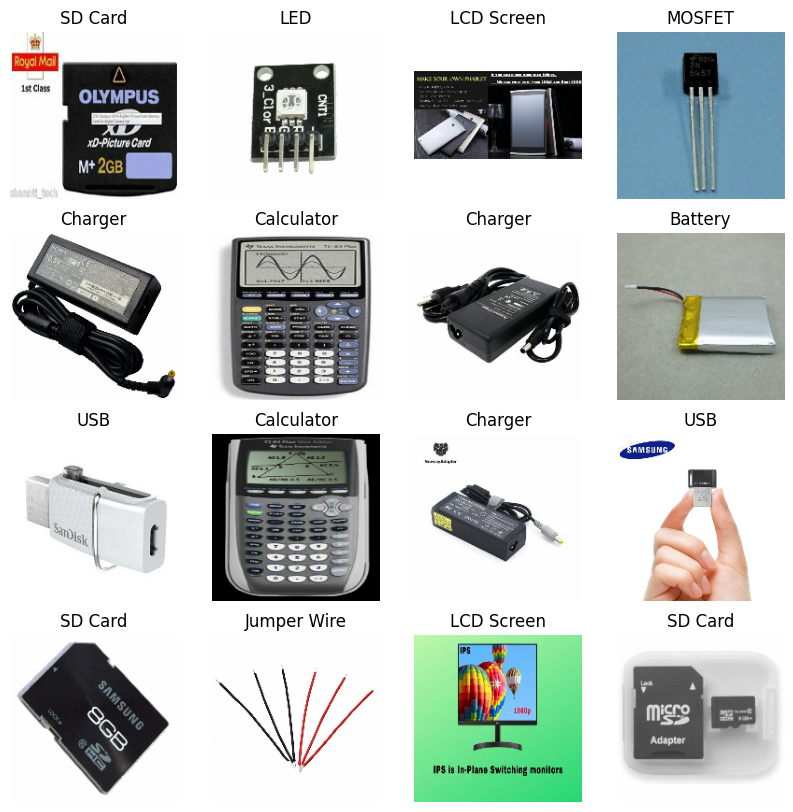

In [ ]:
class_names = ["Battery","Calculator","Charger","Jumper Wire","LCD Screen","LED","MOSFET","Microcontroller","Resistor","SD Card","USB"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
  ]
)

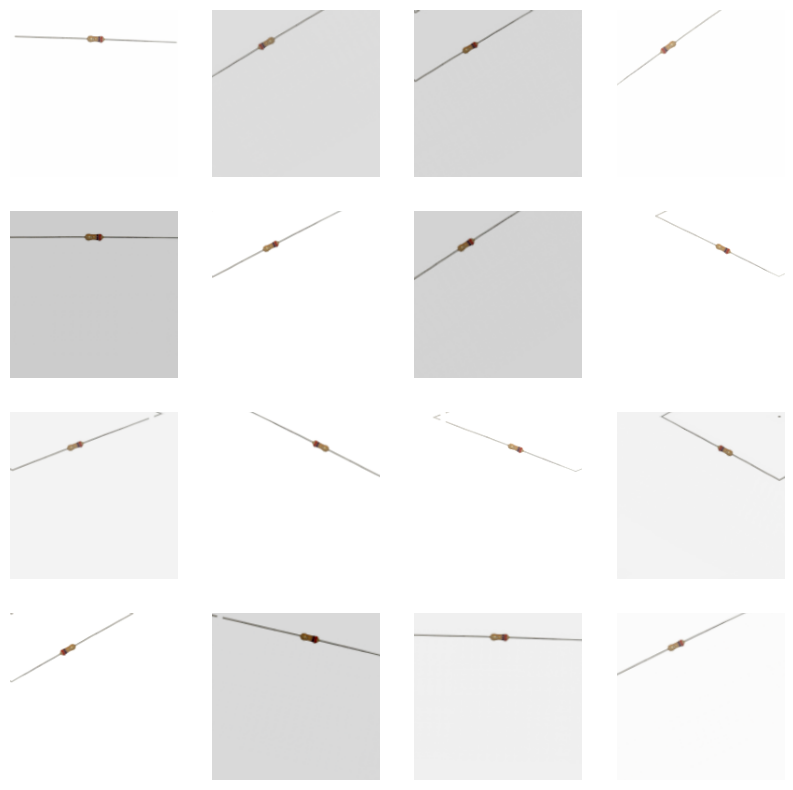

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#This model was the first model used to train early versions of the project
#This is not ultilized in the final run of the code

#num_classes = len(class_names)


#model = tf.keras.Sequential([  #Allows layers to be added to the neural network
  #tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  #Rescale values in between 0 and 1
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), #Convolutional layer
  #tf.keras.layers.MaxPooling2D(),                   #Cuts feature map size by 4 times
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.Activation("relu"),
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),#Convolutional layer
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), #Convolutional layer
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), #Convolutional layer
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), #Convolutional layer
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Flatten(),        #After learning, flattens the images so that they are 1D
  #tf.keras.layers.Dense(128, activation='relu'),    #Only contains neurons, 128 in total
  #tf.keras.layers.Dense(num_classes)

#]
#)

#tf.keras.utils.plot_model(model, show_shapes=True)

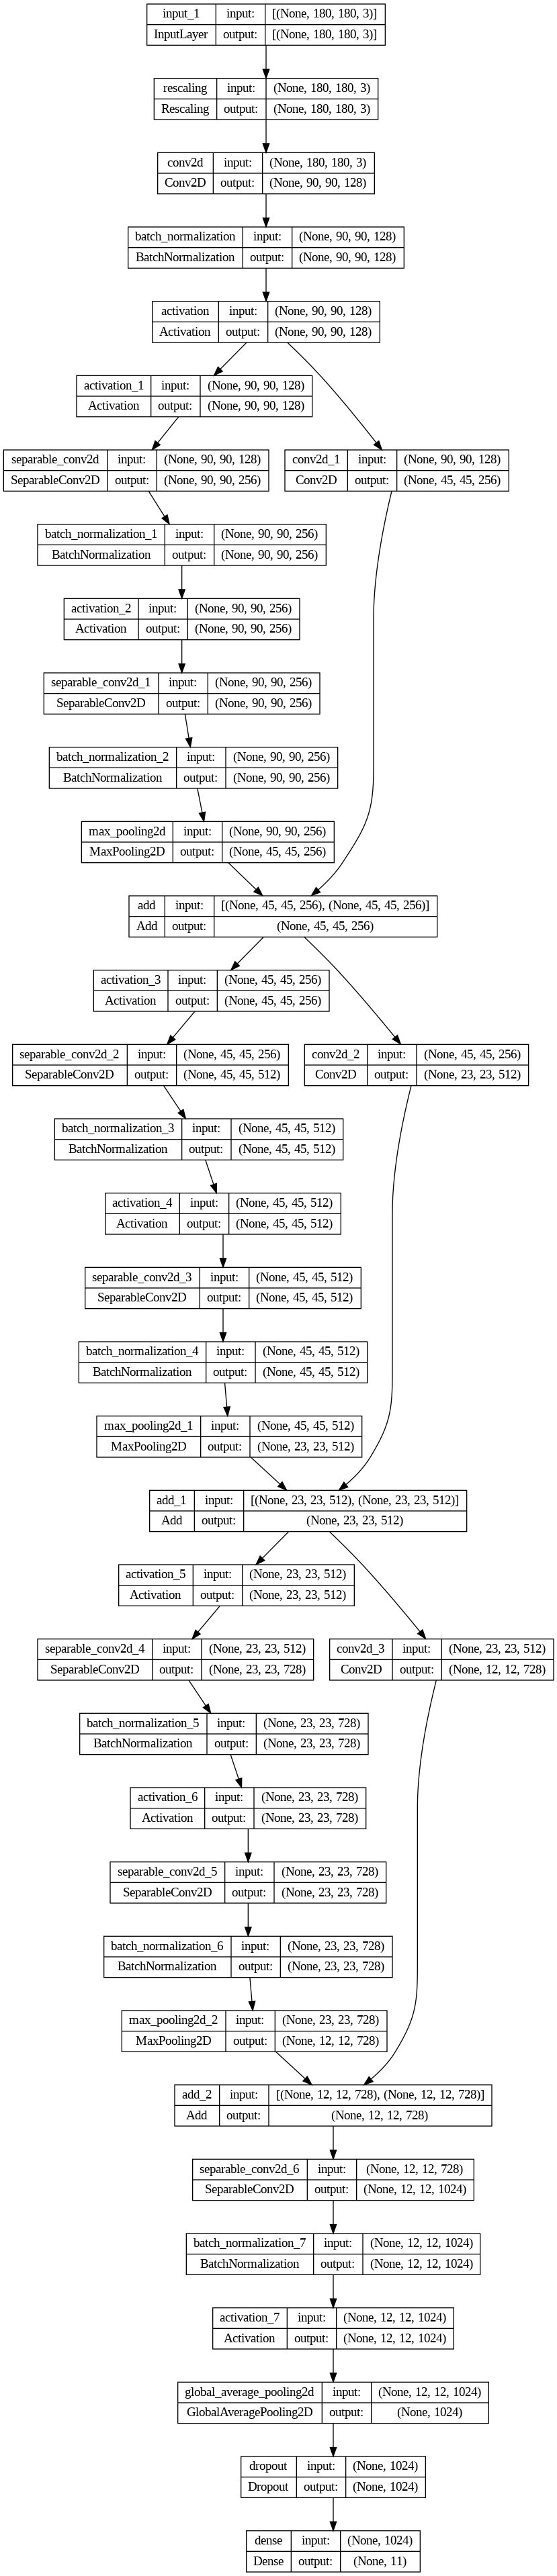

In [ ]:
#This is an experimental custom written model

num_classes = len(class_names)

def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)


    # Entry block
    x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"


    x = tf.keras.layers.Dropout(0.7)(x)
    outputs = tf.keras.layers.Dense(11, activation=activation)(x)  #Units must be updated as more categories are added
    return tf.keras.Model(inputs, outputs)

image_size = (img_height, img_width)
model = make_model(input_shape=image_size + (3,), num_classes=11)
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
epochs = 25

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
model.evaluate(test_ds)

In [ ]:
import numpy

plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
  classifications = model(images)
  #print(classifications)

  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " |Real: " + class_names[labels[i]])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) #convert neural network into TF Lite model
tflite_model = converter.convert() #converts model into the proper TF Lite file type

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)  #Write the saved TF lite model into a new file